# This notebook imports an image and displays image channels

## Import libraries

In [1]:
from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,20]

import os

## Define the functions

In [2]:
def get_channel(img, channel):
    # try to get channel, if not successful return a blank grey image
    try:
        img_channel = img.getchannel(channel)
        is_channel = True
    except:
        is_channel = False

        #if there is an exception, just create a blank grey image
        img_channel = Image.new('L', img.size, "gray")

    #return the image and the is_channel boolean flag
    return(img_channel, is_channel)



def explore_rgba_channels(img):
    #Print some basic info
    print("Input image mode: ", img.mode)
    print("Input image size: ", img.size, "\n")

    #Get the grey scale version and channels
    img_grey = img.convert('L')

    #try to get channels
    (img_red, is_red) = get_channel(img, 'R')
    (img_green, is_green) = get_channel(img, 'G')
    (img_blue, is_blue) = get_channel(img, 'B')
    (img_alpha, is_alpha) = get_channel(img, 'A')

    # Plt the original, greyscale and channels
    fig, axs = plt.subplots(3, 2)

    #Plot original input image
    #Grey images shown with gray colur map
    if img.mode == "L":
        axs[0, 0].imshow(img, cmap = 'gray', vmin=0, vmax=255)
    else:
        axs[0,0].imshow(img)
    axs[0,0].set_title('Input image')
    axs[0,0].axis('off')

    #Plot a greyscale version
    axs[0,1].imshow(img_grey, cmap = 'gray', vmin=0, vmax=255)
    axs[0,1].set_title('Greyscale version')
    axs[0,1].axis('off')

    #Plot different channels in greyscale
    axs[1,0].imshow(img_red, cmap = 'gray', vmin=0, vmax=255)
    axs[1,0].set_title("Red channel" if is_red else "No red channel")
    axs[1,0].axis('off')

    axs[1,1].imshow(img_green, cmap = 'gray', vmin=0, vmax=255)
    axs[1,1].set_title("Green channel" if is_green else "No green channel")
    axs[1,1].axis('off')

    axs[2,0].imshow(img_blue, cmap = 'gray', vmin=0, vmax=255)
    axs[2,0].set_title("Blue channel" if is_blue else "No blue channel")
    axs[2,0].axis('off')

    axs[2,1].imshow(img_alpha, cmap = 'gray', vmin=0, vmax=255)
    axs[2,1].set_title("Alpha channel" if is_alpha else "No alpha channel")
    axs[2,1].axis('off')

    plt.show()



## Using the function

Examples assume the image files "motorbike.jpg" and "circles.png" are in the same directory as rgba_channels.py

### Example 1 - importing an RGB image

Input image mode:  RGB
Input image size:  (3637, 2728) 



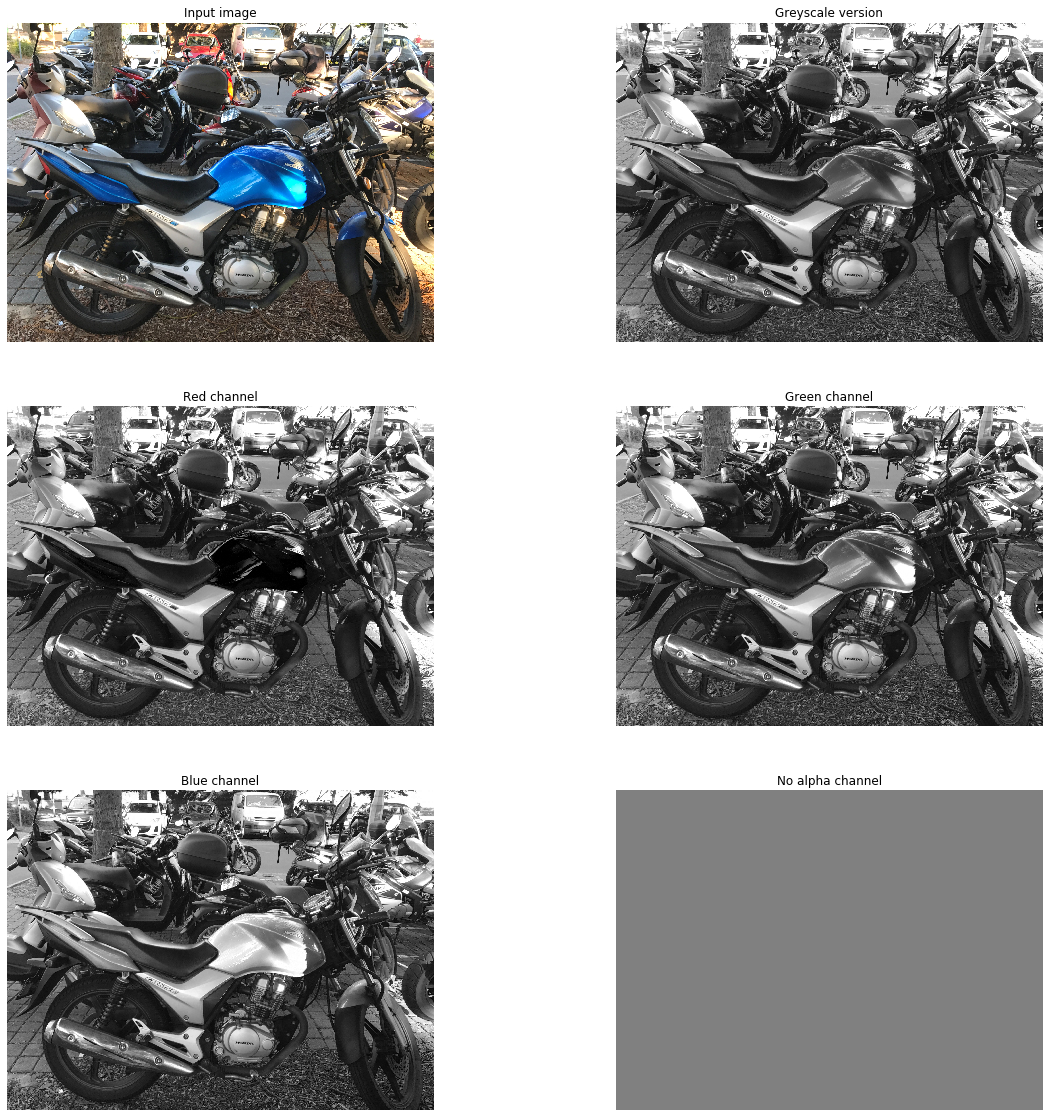

In [3]:
filepath = os.path.join("images", "motorbike.jpg")

with Image.open(filepath) as img:
  explore_rgba_channels(img)

### Example 2 - importing an RGBA image


Input image mode:  RGBA
Input image size:  (628, 443) 



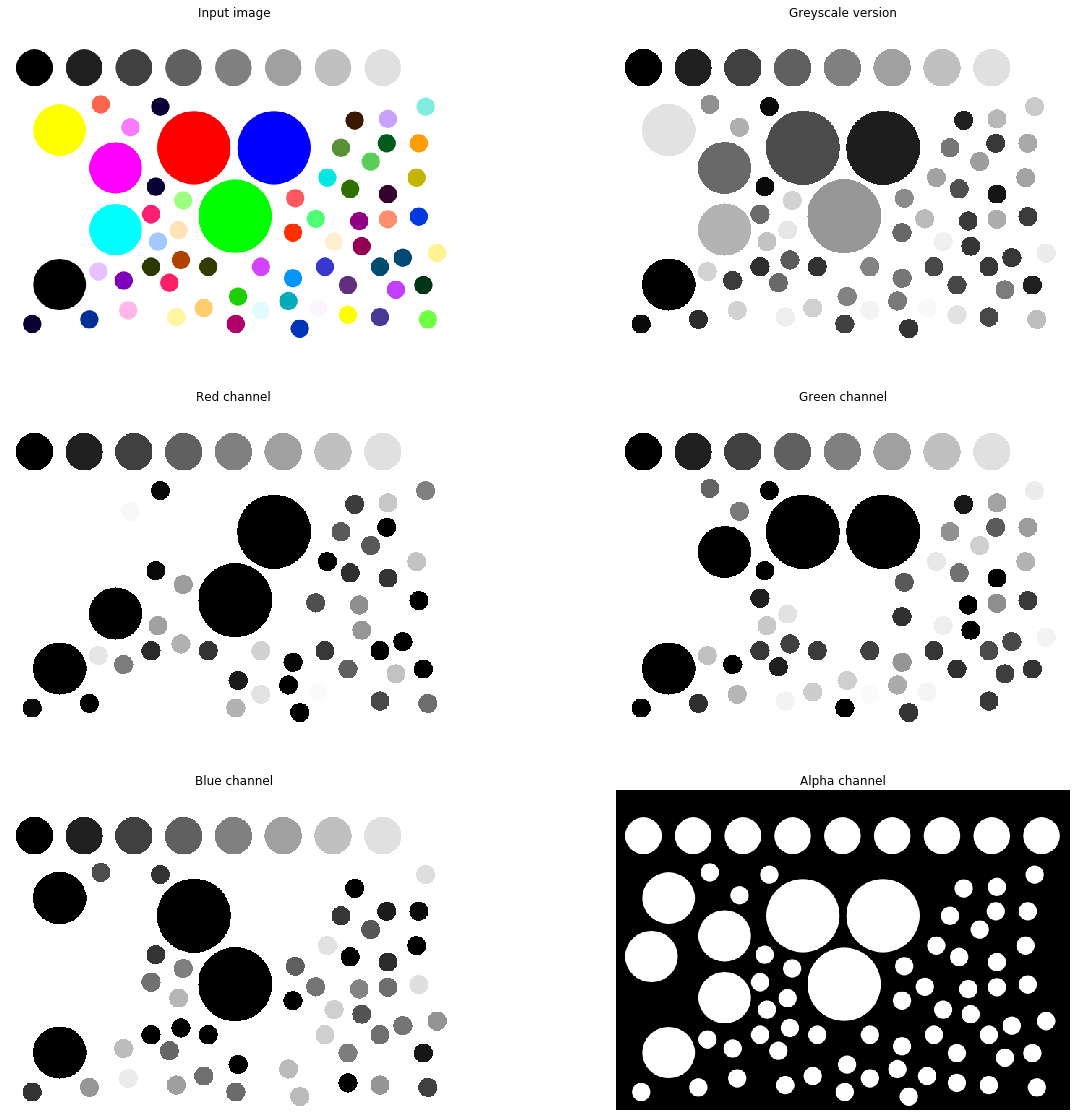

In [4]:
filepath = os.path.join("images", "circles.png")

with Image.open(filepath) as img:
  explore_rgba_channels(img)

### Example 3 - importing an RGB image and converting it to RGBA image
Note that it will have an alpha channel but it is all white

Input image mode:  RGBA
Input image size:  (3637, 2728) 



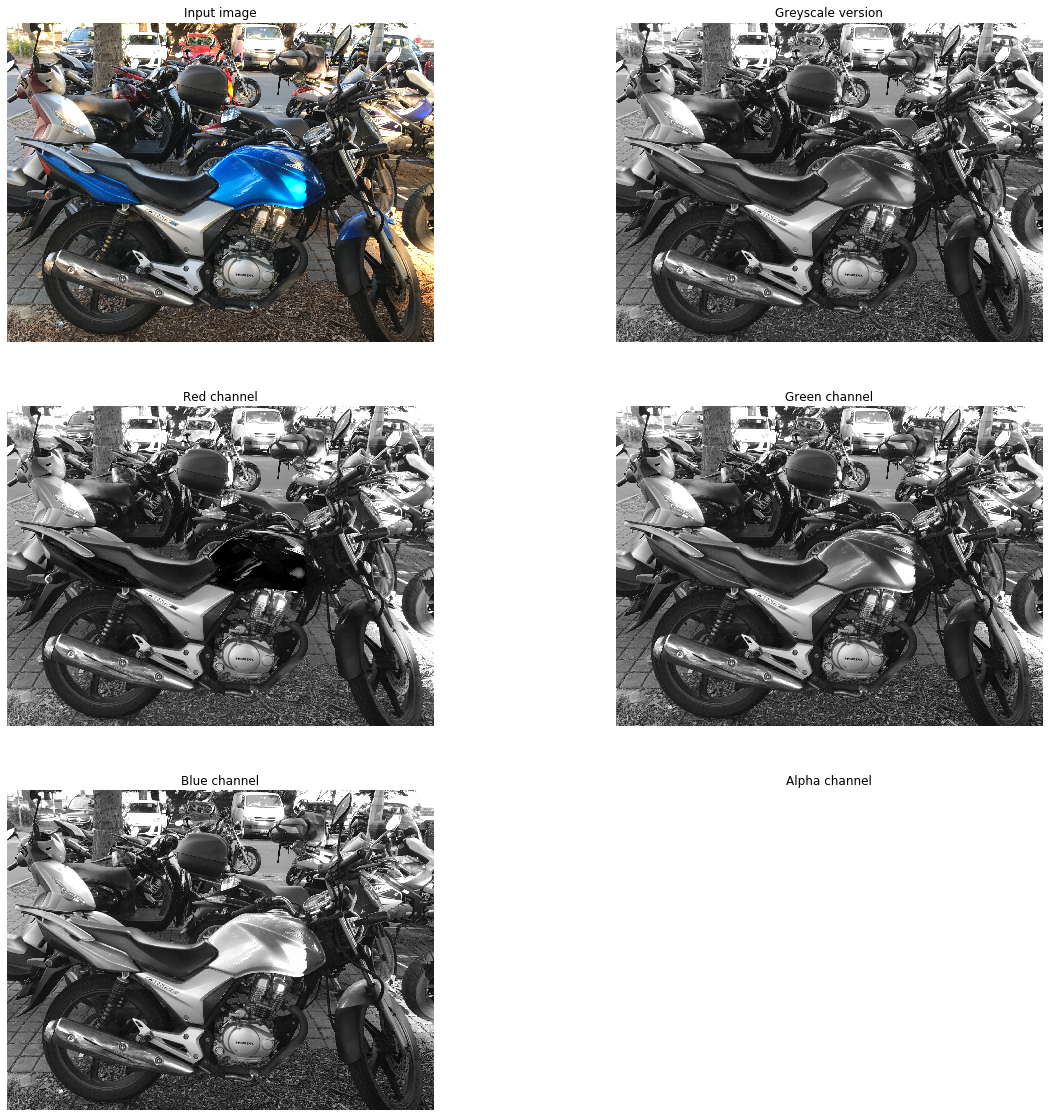

In [5]:
filepath = os.path.join("images", "motorbike.jpg")

with Image.open(filepath).convert('RGBA') as img:
  explore_rgba_channels(img)

### Example 4 - importing an RGB image and converting it to a greyscale image
Note there will be no RGB channels

Input image mode:  L
Input image size:  (3637, 2728) 



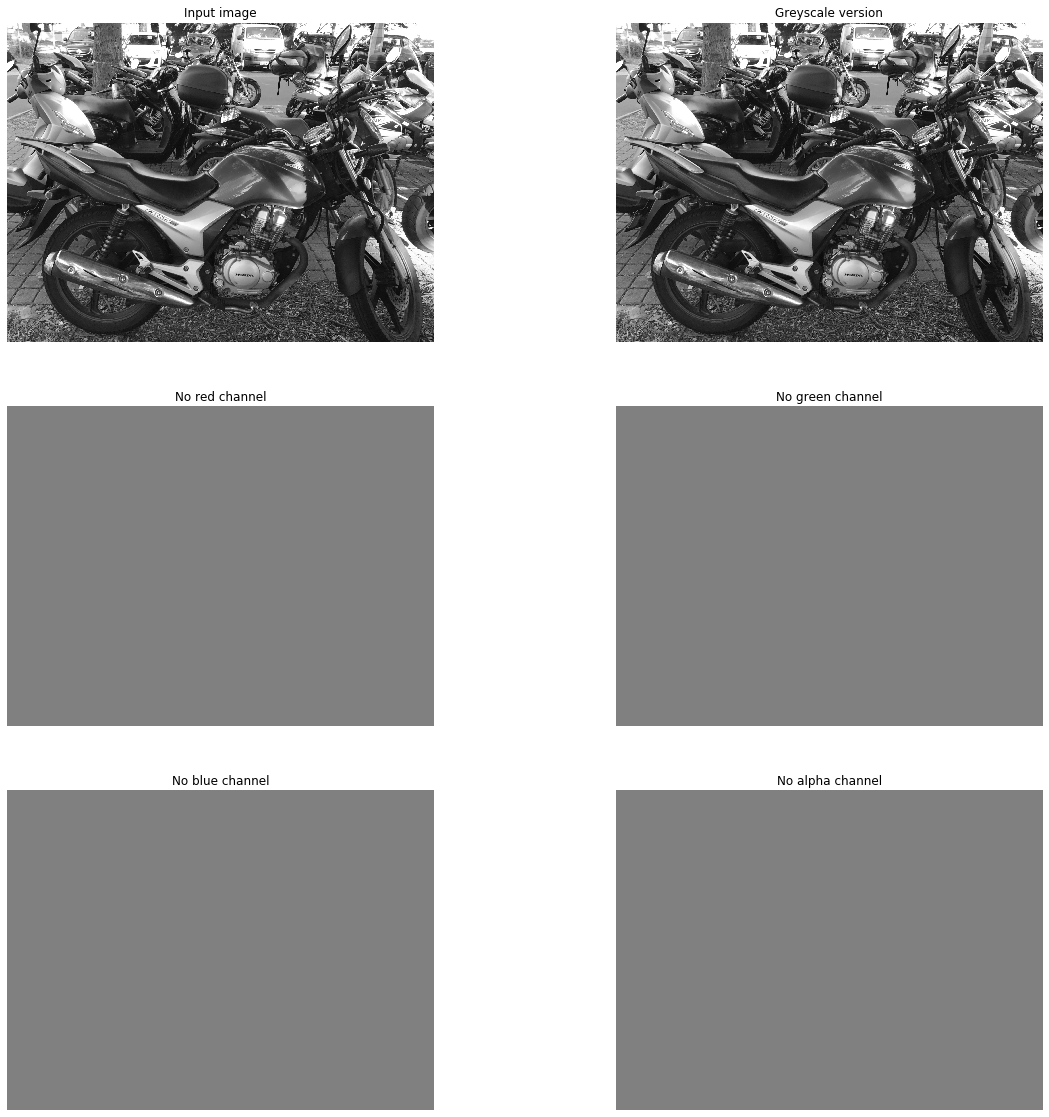

In [6]:
filepath = os.path.join("images", "motorbike.jpg")

with Image.open(filepath).convert('L') as img:
 explore_rgba_channels(img)

### Example 5 - importing an RGB image and converting it to a CMYK image
Note there will be no RGB channels

Input image mode:  CMYK
Input image size:  (3637, 2728) 



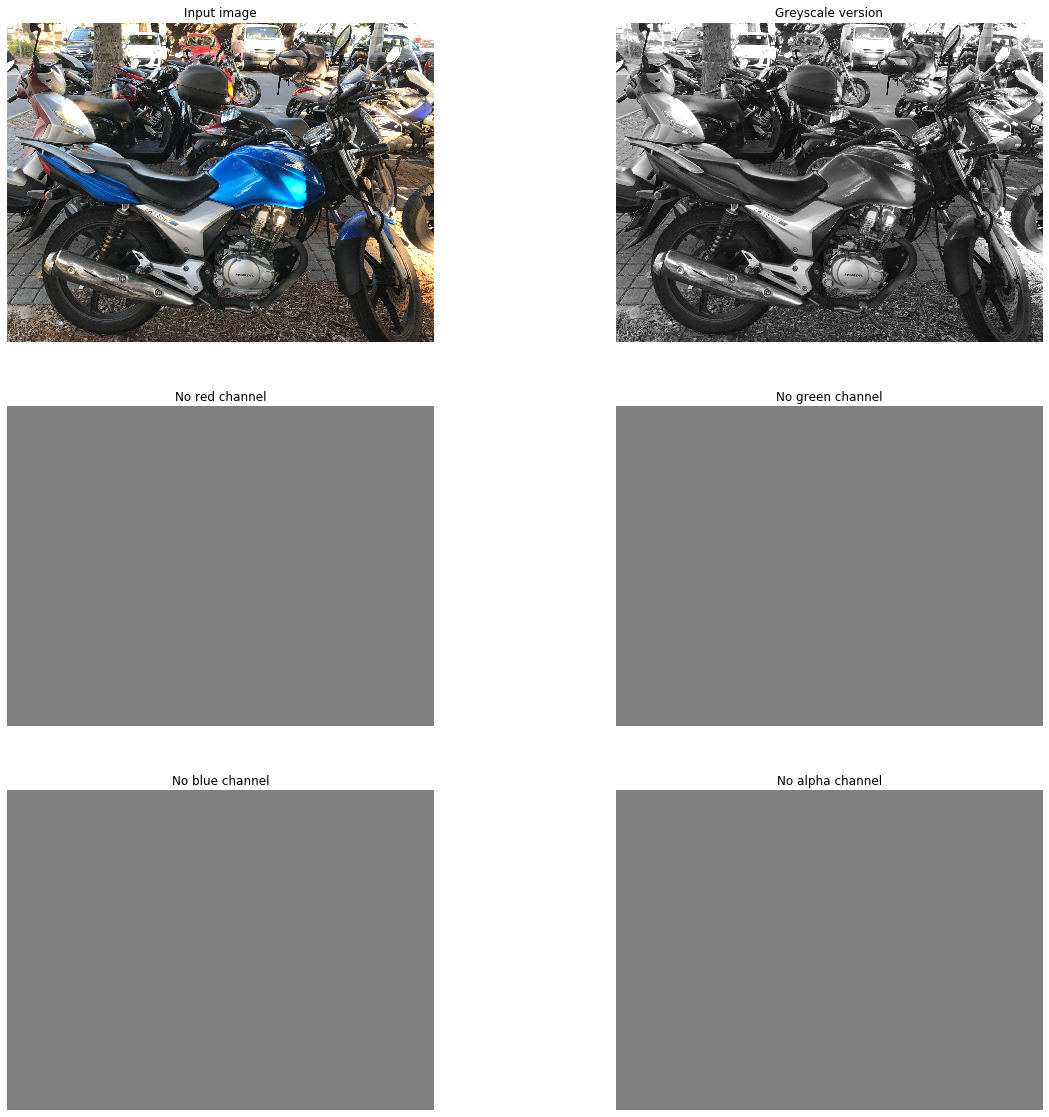

In [7]:
filepath = os.path.join("images", "motorbike.jpg")

with Image.open(filepath).convert('CMYK') as img:
 explore_rgba_channels(img)
